In [90]:
import pandas as pd
import matplotlib.pyplot as plt

Тут видаляються певні колонки які не несуть цінної інформації (ім'я того хто заповнював або ж посилання). 
У другому датафреймі відфільтровано також останні рядки. Вони містили пояснення, а не табличні значення.

In [91]:
df = pd.read_csv("1778.csv")
df = df.drop(df.columns[0],axis = 1 )
df.columns = df.iloc[2]
df = df.iloc[3:].reset_index(drop = True)


da = pd.read_csv("1897.csv")
da = da.drop(da.columns[:4],axis = 1 )
da = da[:1548]
da = da[~da["ФИО"].isna()].reset_index(drop = True)
da


,ID Домохозяйствао,ID жилец,ФИО,Пол,Глава хозяйства и глава семьи,Возраст,Семейный статус,"Сословие, состояние или звание",Здесь ли родился,Место рождения,...,Здесь ли обыкновенно проживает,Отметка об отсуствии,Вероисповедание,Родной язык,Умеет ли читать,Обучение,Профессия главное,Профессия вспомогательное,Положение по воинской повинности,Примітки
0,1.0,1.0,Krasovskij Pantelejmon Ivanovich,m,husband,32,married,cossack,1.0,Dunaec,...,1,NaN,orthodox,ukr,1.0,rural school,farmer,NaN,Nizhnij chin zapasu,NaN
1,1.0,2.0,Krasovskaya Stefanida Artemieva,f,wife,28,married,cossack,0.0,"Chernigovskaya gub., Glukhovskij pov., Kholopk...",...,1,NaN,orthodox,ukr,0.0,NaN,farmer with husband,NaN,NaN,NaN
2,1.0,3.0,Krasovskaya Anna Pantelejmonova,f,daughter,5,unmarried,cossack,1.0,Dunaec,...,1,NaN,orthodox,ukr,0.0,NaN,with father,NaN,NaN,NaN
3,1.0,4.0,Krasovskij Stefan Pantelejmonov,m,son,1,unmarried,cossack,1.0,Dunaec,...,1,NaN,orthodox,ukrm,0.0,NaN,with father,NaN,NaN,NaN
4,1.0,5.0,Krasovskij Ivan Kondratov,m,father,70,vidov,cossack,1.0,Dunaec,...,1,NaN,orthodox,ukr,0.0,NaN,with son,NaN,NaN,Slep na oba hlaza 10 let nazad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,261.0,2.0,Gricunova Motrona Nikolaeva,f,wife,30,married,peasant-owner,0.0,"Chernigovskaya gub., Glukhovskij pov., m. Glukhov",...,1,NaN,orthodox,ukr,0.0,NaN,with husband,NaN,NaN,NaN
1541,261.0,3.0,Gricunova Elena Sergeeva,f,daughter,9,unmarried,peasant-owner,0.0,"Chernigovskaya gub., Glukhovskij pov., Tuligol...",...,1,NaN,orthodox,ukr,0.0,NaN,with father,NaN,NaN,NaN
1542,261.0,4.0,Gricunov Nikolaj Sergeev,m,son,7,unmarried,peasant-owner,0.0,"Chernigovskaya gub., Glukhovskij pov., m. Glukhov",...,1,NaN,orthodox,ukr,0.0,NaN,with father,NaN,NaN,NaN
1543,261.0,5.0,Gricunov Aleksandr Sergeev,m,son,5,unmarried,peasant-owner,0.0,"Chernigovskaya gub., Glukhovskij pov., s. Godu...",...,1,NaN,orthodox,ukr,0.0,NaN,with father,NaN,NaN,NaN


In [92]:
transliter = {
    "А": "A",   "а": "a",
    "Б": "B",   "б": "b",
    "В": "V",   "в": "v",
    "Г": "G",   "г": "g",
    "Д": "D",   "д": "d",
    "Е": "E",   "е": "e",
    "Ё": "Yo",  "ё": "yo",
    "Ж": "Zh",  "ж": "zh",
    "З": "Z",   "з": "z",
    "И": "I",   "и": "i",
    "Й": "Y",   "й": "y",
    "К": "K",   "к": "k",
    "Л": "L",   "л": "l",
    "М": "M",   "м": "m",
    "Н": "N",   "н": "n",
    "О": "O",   "о": "o",
    "П": "P",   "п": "p",
    "Р": "R",   "р": "r",
    "С": "S",   "с": "s",
    "Т": "T",   "т": "t",
    "У": "U",   "у": "u",
    "Ф": "F",   "ф": "f",
    "Х": "Kh",  "х": "kh",
    "Ц": "Ts",  "ц": "ts",
    "Ч": "Ch",  "ч": "ch",
    "Ш": "Sh",  "ш": "sh",
    "Щ": "Shch","щ": "shch",
    "Ъ": '',    "ъ": '',
    "Ы": "Y",   "ы": "y",
    "Ь": '',    "ь": '',
    "Э": "E",   "э": "e",
    "Ю": "Yu",  "ю": "yu",
    "Я": "Ya",  "я": "ya"
} # проста транслітерація, список вкрадено з вікіпедії
for ru, en in transliter.items():
    df["Прізвище"] = df["Прізвище"].str.replace(ru, en)

df["Прізвище"] = df.Прізвище.fillna(method = "ffill")


df.Прізвище.unique()

C:\Users\denys\AppData\Local\Temp\ipykernel_27836\2848173781.py:39: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Прізвище"] = df.Прізвище.fillna(method = "ffill")


array(['Lukashevich', 'Ovseenko', 'Starchenko', 'Vasilenko',
       'Gayvoronets', 'Khomenko', 'Leshchenko', 'Tsikal', 'Naumenko',
       'Onoprienko', 'Druchok', 'Gaevoy', 'Sereda', 'Skorupa', 'Dyatal',
       'Skovey', 'Illyashenko', 'Korsun', 'Lukash', 'Gerasimenko',
       'Krasovskiy', 'Ignatenko', 'Oksenenko', 'Babich',
       'nevestka Grigoriya vdova', 'Smychok', 'Reznichenko', 'Davidenko',
       'Kirichenkova', 'Telyuga', 'Savchenko', 'Moskalets', 'Mochalkina',
       'Manko', 'Moskovchenko', 'Dovgopolyy', 'Tsavun', 'Bondarets',
       'Grigoriev', 'Garkun', 'Malafeev', 'Voronenko', 'Panchenko',
       'Shkomenkova', 'Mekhedon', 'Babenko', 'Shevchenko', 'Rozhen',
       'Khvilenko', 'Koval', 'Kozel', 'Prokopets', 'Kulish', 'Lavrentiev',
       'Vorobey', 'Tishchenko', 'Gladchenko', 'Rudichka', 'Gayduk',
       'Boychenko', 'Sozon', 'Gavris', 'Trembach', 'Malyura', 'Poznyak',
       'Pokrovskiy', 'Bortnik', 'Matyushenko', 'Murashka', 'Litvak',
       'Blin', 'Byrin', 'Mukorez'

Створення списку із прізвищ які повторюються в обох переписах.

In [93]:
a = []
for i in df.Прізвище.unique():
    if len(da[da["ФИО"].str.contains(f"{i}")] ) >0 :
        a.append(i)

a

['Ovseenko',
 'Starchenko',
 'Naumenko',
 'Druchok',
 'Sereda',
 'Korsun',
 'Lukash',
 'Ignatenko',
 'Oksenenko',
 'Babich',
 'Davidenko',
 'Moskovchenko',
 'Grigoriev',
 'Babenko',
 'Rozhen',
 'Kozel',
 'Lavrentiev',
 'Tishchenko',
 'Sozon',
 'Poznyak',
 'Bortnik',
 'Mukorez',
 'Mishchenko']

Підрахунок кількість людей у сім'ї станом на різні роки, а також статус у 1778 році.

In [94]:
b_1778= []
b_1897= []
status = []
for i in a:
    d = df[df.Прізвище.str.contains(f"{i}")].Прізвище
    c = da[da["ФИО"].str.contains(f"{i}")].ФИО
    f = df[df.Прізвище.str.contains(f"{i}")]["Соціальний статус"]
    status.append(f.iloc[0])
    b_1778.append(len(d))
    b_1897.append(len(c))
difference = [ y - x for x, y in zip(b_1778, b_1897)]


status

['военные',
 'военные',
 'военные',
 'военные',
 'военные',
 'военные',
 'духовные',
 'военные',
 'военные',
 'военные',
 'военные',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые',
 'посполитые']

Розподіл на групи за статусом та візуалізація.

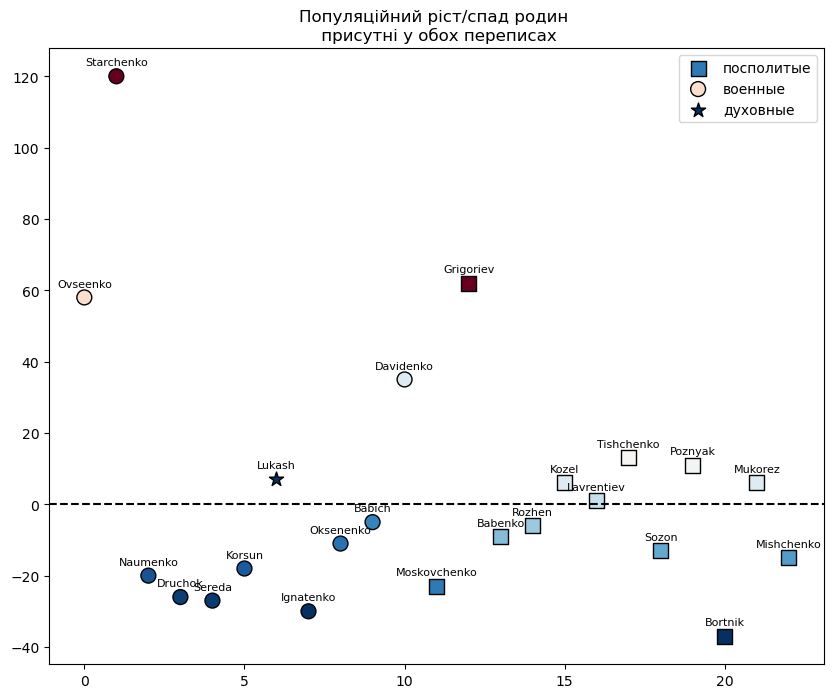

In [95]:

x = list(range(len(difference)))
plt.figure(figsize=(10,8))

x_s = []
d_s = []
x_c = []
d_c = []
x_t = []
d_t = []


for i in range(len(x)):
    if status[i]== "военные":
        x_s.append(x[i])
        d_s.append(difference[i])
    elif status[i] == "посполитые":
        x_t.append(x[i])
        d_t.append(difference[i])
    else:
        d_c.append(difference[i])
        x_c.append(x[i])

plt.scatter(x_t,d_t,c = d_t,cmap = "RdBu_r",edgecolors = "black", s = 115,marker = "s",label = "посполитые")
plt.scatter(x_s,d_s,c = d_s ,cmap = "RdBu_r",edgecolors = "black", s = 115,marker = "o",label = "военные")
plt.scatter(x_c,d_c, c = d_c,cmap = "RdBu_r",edgecolors = "black", s = 115,marker = "*", label = "духовные")


for i,text in zip(x,a):
    plt.text(x[i],difference[i]+3,text,fontsize=8, color="black",ha="center")
plt.legend()
plt.title("Популяційний ріст/спад родин \n присутні у обох переписах")

plt.axhline(0, color="black", linestyle="--")

Фільтрація для отримання колонки з віком з перепису 1897 року

In [96]:
df_men = df[df.columns[[3,14]]]
df_men = df_men.dropna(axis = 0, how = "any").drop("Чоловіки",axis = 1).reset_index(drop = True)


df_men

2,Вік
0,44
1,15
2,14
3,4
4,37
...,...
821,13
822,9
823,25
824,43


In [97]:
labels = ["0-9","10-19","20-29","30-39","40-49","50-59","60-69","70-79","80-89"]
df_w = df[df.columns[[4, 14]]]
df_w = df_w.dropna(axis=0, how="any").drop("Жінки",axis = 1).reset_index(drop = True)

df_w = df_w[df_w.columns[0]]
df_w = pd.to_numeric(df_w, errors="coerce")



w = pd.cut(df_w,range(0,91,10),labels = labels,right = False).value_counts().sort_index()


df_men = df[df.columns[[3,14]]]
df_men = df_men.dropna(axis = 0, how = "any").drop("Чоловіки",axis = 1).reset_index(drop = True)
df_men = df_men[df_men.columns[0]]
df_men = pd.to_numeric(df_men, errors="coerce")



m = pd.cut(df_men,range(0,91,10),labels = labels,right = False).value_counts().sort_index()



"""
Тепер створення колонки з віком з переписом за 1778 рік
"""
da_w = da[da.Пол == "f"][["Пол","Возраст"]]
da_w = da_w.dropna(axis = 0, how = "any").reset_index(drop = True).Возраст

"""
в даних присутні записи на кшталт 6 month, тому присутній наступний цикл. 
less,week і day просто змінюються на 0.1, адже вони і так потраплять до однієї групи 0-9 років.
"""
for i in range(len(da_w)):
    if "less" in str(da_w.iloc[i]) or "week" in str(da_w.iloc[i]) or "day" in str(da_w.iloc[i]):
        da_w.iloc[i] = 0.1
    elif "mon" in str(da_w.iloc[i]):
        a = da_w.iloc[i].split()
        da_w.iloc[i] = int(a[0])/12
        

da_w = pd.to_numeric(da_w, errors="coerce")

w_1897 = pd.cut(da_w,range(0,91,10),labels =labels,right = False).value_counts().sort_index()


da_m = da[da.Пол == "m"][["Пол","Возраст"]]
da_m = da_m.dropna(axis = 0, how = "any").reset_index(drop = True).Возраст

for i in range(len(da_m)):
    if "less" in str(da_m.iloc[i]) or "week" in str(da_m.iloc[i]) or "day" in str(da_m.iloc[i]):
        da_m.iloc[i] = 0.1
    elif "mon" in str(da_m.iloc[i]):
        a = da_m.iloc[i].split()
        da_m.iloc[i] = int(a[0])/12


da_m = pd.to_numeric(da_m, errors="coerce")

m_1897 = pd.cut(da_m,range(0,91,10),labels = labels,right = False).value_counts().sort_index()

pop = len(df_men)+len(df_w)
pop_1897  = len(da_m)+len(da_w)
m = [x/pop for x in m]
w = [x/pop for x in w]
m_1897 = [x/pop_1897 for x in m_1897]
w_1897 = [x/pop_1897 for x in w_1897]


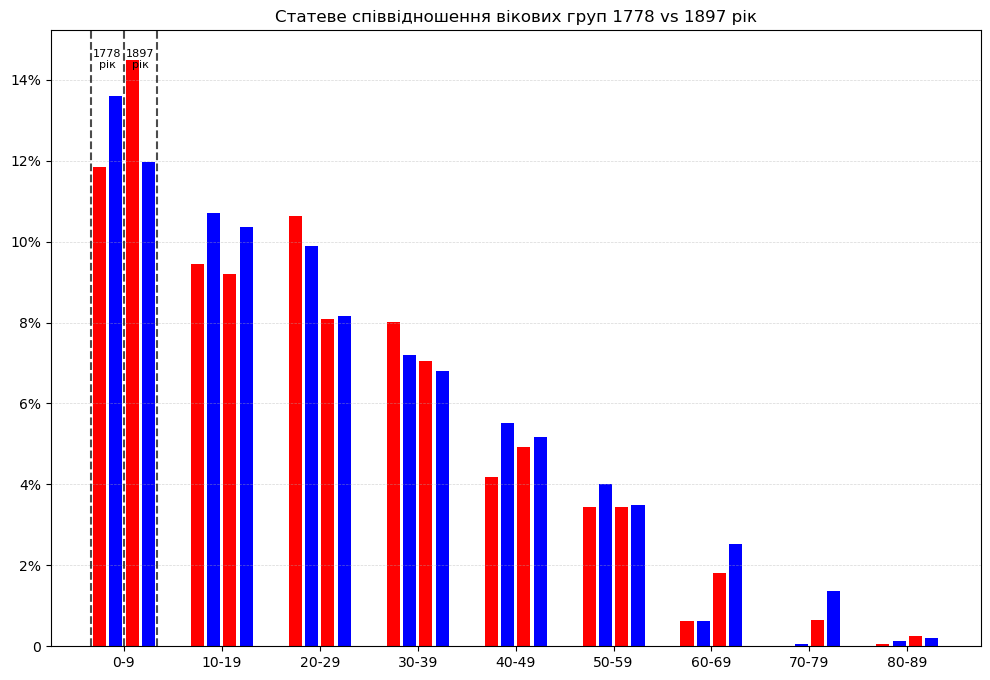

In [98]:
plt.figure(figsize=(12,8))
tick = range(0,54,6)
for i in range(len(m_1897)):
    plt.bar(6*i-0.5,m[i],color = "blue")
    plt.bar(6*i-1.5,w[i],color = "red")
    plt.bar(6*i +0.5,w_1897[i],color="red")
    plt.bar(6*i +1.5 ,m_1897[i],color="blue")

plt.axvline(0,color = "black",alpha = 0.7,linestyle = "--")
plt.axvline(-2,color = "black",alpha = 0.7,linestyle = "--")
plt.axvline(2,color = "black",alpha = 0.7,linestyle = "--")
plt.text(-1,0.145,"1778\nрік",ha = "center",va = "center",fontsize = 8)
plt.text(1,0.145,"1897\nрік",ha = "center",va = "center",fontsize = 8)
plt.xticks(tick,labels)
plt.yticks([0,0.02,0.04,0.06,0.08,0.1,0.12,0.14],[0,"2%","4%","6%","8%","10%","12%","14%"])

plt.grid(True,which = "both",axis = "y",linestyle="--",linewidth=0.5,alpha=0.5)
plt.title("Статеве співвідношення вікових груп 1778 vs 1897 рік")

plt.show()

Далі проведений аналіз зі структури родини, а саме кількості дітей у сім'ї, основної метою було з'ясувати наскільки велику частку становили багатодітні сім'ї. Алгоритм полягає в тому, що діти завжди записуються після матері, або вдов/вдова. Звісно підрахунки не є зовсім точними, передусім через можливість того, що діти могли з'їхати від батьків, проте результат досі показує значні зміни за 100 річний період.

In [99]:
a = df["Родиний статус"]
family = len(a[a.str.contains("жена|вдов",na = False)])
print(family)
a = df["Родиний статус"].fillna("").str.strip()


three = 0
two = 0
one = 0
four_or_more = 0
for i in range(len(a)-3):
    if ("жена"in a.iloc[i].strip() or "вдов" in a.iloc[i].strip()) and a.iloc[i+1].strip().startswith(("дочь","сын"))and a.iloc[i+2].strip().startswith(("дочь","сын"))and a.iloc[i+3].strip().startswith(("дочь","сын")):
        three+=1
for i in range(len(a)-3):
    if ("жена"in a.iloc[i].strip() or "вдов" in a.iloc[i].strip()) and a.iloc[i+1].strip().startswith(("дочь","сын")):
        one+=1
for i in range(len(a)-3):
    if ("жена"in a.iloc[i].strip() or "вдов" in a.iloc[i].strip()) and a.iloc[i+1].strip().startswith(("дочь","сын"))and a.iloc[i+2].strip().startswith(("дочь","сын")):
        two+=1
for i in range(len(a)-3):
    if ("жена"in a.iloc[i].strip() or "вдов" in a.iloc[i].strip()) and a.iloc[i+1].strip().startswith(("дочь","сын"))and a.iloc[i+2].strip().startswith(("дочь","сын"))and a.iloc[i+3].strip().startswith(("дочь","сын"))and a.iloc[i+4].strip().startswith(("дочь","сын")):
        four_or_more+=1
null = family - one
one = one - two 
two = two - three
three = three - four_or_more

bar = [null,one, two,three,four_or_more]


438


Лише в одному домогосподарстві присутні два husband(ID домогосподарства = 212), тому код це не фільтрує, а вручну додано до трьох змінних по одиниці

Логіка виявлення багатодітних сімей трошки інакша. Усі записи стану в сім'ї відносяться до голови сім'ї, тому для підрахунку дітей голови сім'ї достатньо знайти скільки записів у певному домогосподарстві =son. Алгоритм виявлення багатодітних внуків/правнуків схожий на перепис населленя 1778 року, лише замість "жена" ми шукаємо "in-law".

In [100]:
h = []

a = da[da.columns[[0,4]]]
family1897 = da[da.columns[6]]
family1897 = round(len(family1897[family1897 == "vidov"])+ len(family1897[family1897== "married"])/2) 
one_x = 1
two_x = 1
three_x = 1
four_or_more_x = 0
for i in da["ID Домохозяйствао"].unique():
    b = da[da["ID Домохозяйствао"] == i]
    husband = b[b["Глава хозяйства и глава семьи"]=="husband"]
    # if len(husband) >1 :
    #     husb.append(i)
    son = b[(b["Глава хозяйства и глава семьи"]=="son") | (b["Глава хозяйства и глава семьи"]=="daughter")]
    if len(son) ==3 :
        three_x += 1 
    elif len(son) == 1:
        one_x += 1
    elif len(son) == 2:
        two_x += 1
    elif len(son) >= 4:
        four_or_more_x += 1


grand_a = da[da.columns[[0,4]]]
grand_a = grand_a[grand_a["Глава хозяйства и глава семьи"].str.contains("in-law|grand",na = False)]
grand_a = grand_a[grand_a.columns[1]]

three_x_y = 0
one_x_y = 0
two_x_y = 0
four_or_more_x_y = 0

one_x_y = one_x_y - two_x_y 
two_x_y = two_x_y - three_x_y
three_x_y = three_x_y - four_or_more_x_y

one_x = one_x + one_x_y
two_x = two_x + two_x_y
four_or_more_x = four_or_more_x + four_or_more_x_y
three_x = three_x + three_x_y

for i in range(len(grand_a)-3):
    if "in-law"in grand_a.iloc[i].strip() and "grand" in grand_a.iloc[i+1].strip() and "grand" in grand_a.iloc[i+2].strip() and "grand" in grand_a.iloc[i+3].strip():
            three_x_y +=1     
    elif "in-law"in grand_a.iloc[i].strip() and "grant" in grand_a.iloc[i+1].strip() and "grant" in grand_a.iloc[i+2].strip() and "grant" in grand_a.iloc[i+3].strip():
            three_x_y+=1 
        

for i in range(len(grand_a)-3):
    if "in-law"in grand_a.iloc[i].strip() and "grand" in grand_a.iloc[i+1].strip() and "grand" in grand_a.iloc[i+2].strip() :
            two_x_y +=1     
    elif "in-law"in grand_a.iloc[i].strip() and "grant" in grand_a.iloc[i+1].strip() and "grant" in grand_a.iloc[i+2].strip() :
            two_x_y +=1 

for i in range(len(grand_a)-3):
    if "in-law"in grand_a.iloc[i].strip() and "grand" in grand_a.iloc[i+1].strip():
            one_x_y +=1     
    elif "in-law"in grand_a.iloc[i].strip() and "grant" in grand_a.iloc[i+1].strip():
            one_x_y +=1 

for i in range(len(grand_a)-3):
    if "in-law"in grand_a.iloc[i].strip() and "grand" in grand_a.iloc[i+1].strip() and "grand" in grand_a.iloc[i+2].strip() and "grand" in grand_a.iloc[i+3].strip() and "grand" in grand_a.iloc[i+4].strip():
            four_or_more_x_y +=1     
    elif "in-law"in grand_a.iloc[i].strip() and "grant" in grand_a.iloc[i+1].strip() and "grant" in grand_a.iloc[i+2].strip() and "grant" in grand_a.iloc[i+3].strip() and "grant" in grand_a.iloc[i+4].strip():
            four_or_more_x_y +=1 
        
null_x = family1897 - one_x - two_x -three_x- four_or_more_x

bar_x = [null_x, one_x, two_x, three_x, four_or_more_x]
print(family1897)

412


Text(0.5, 1.0, 'кількість сімей з "n" дітей у родині')

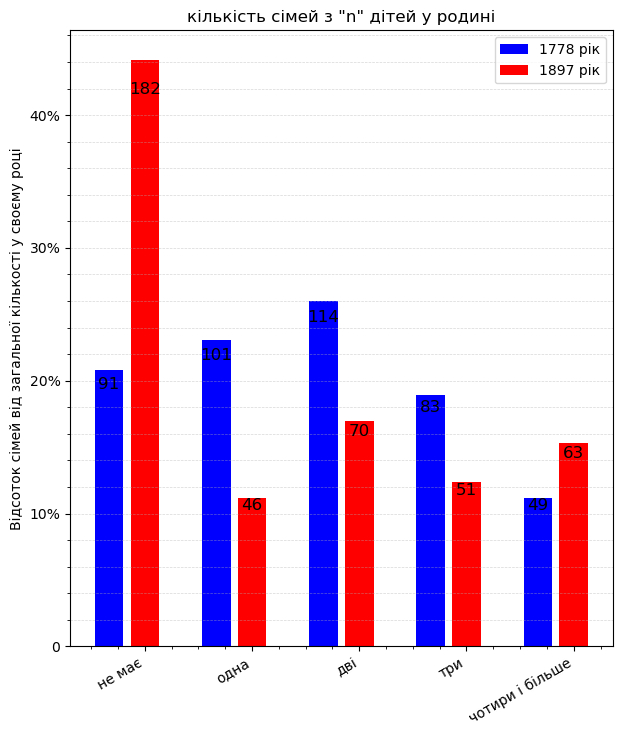

In [101]:

label = ["не має","одна","дві","три","чотири і більше"]
x = [0.5,3.5,6.5,9.5,12.5]


fig, ax = plt.subplots(figsize = (7,8))


for i in range(len(bar_x)):
    if i == 0 :
        plt.bar(3*i-0.5, bar[i]/sum(bar), color = "blue",label = "1778 рік")
        ax.text(3*i-0.5,bar[i]*0.95/sum(bar), bar[i],ha = "center",va = "center",color = "black",fontsize = 12)
        plt.xticks(x, label, ha="right",rotation = 30)
        plt.bar(3*i+0.5,bar_x[i]/sum(bar_x),color = "red", label = "1897 рік")
        ax.text(3*i+0.5,bar_x[i]*0.95/sum(bar_x), bar_x[i],ha = "center",va = "center",color = "black",fontsize = 12)
    else:
        plt.bar(3*i-0.5, bar[i]/sum(bar), color = "blue")
        ax.text(3*i-0.5,bar[i]*0.95/sum(bar), bar[i],ha = "center",va = "center",color = "black",fontsize = 12)
        plt.xticks(x, label, ha="right",rotation = 30)
        plt.bar(3*i+0.5,bar_x[i]/sum(bar_x),color = "red")
        ax.text(3*i+0.5,bar_x[i]*0.95/sum(bar_x), bar_x[i],ha = "center",va = "center",color = "black",fontsize = 12)

    
plt.ylabel("Відсоток сімей від загальної кількості у своєму році",rotation = 90)
plt.legend()   
plt.yticks([0,0.1,0.2,0.3,0.4],["0","10%","20%","30%","40%"])

ax.minorticks_on()
plt.grid(True,which = "both",axis = "y",linestyle="--",linewidth=0.5,alpha=0.5)
plt.title("кількість сімей з \"n\" дітей у родині")

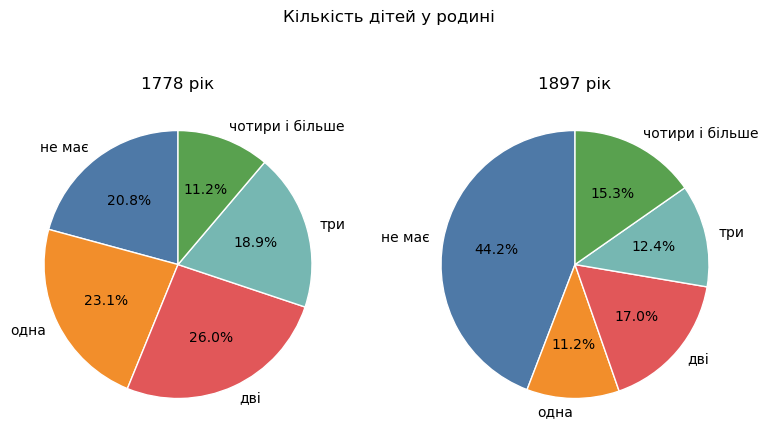

In [102]:
pie = [x/sum(bar) for x in bar]
pie_x = [x/sum(bar_x) for x in bar_x]
colors = ["#4E79A7", "#F28E2B", "#E15759", "#76B7B2", "#59A14F"] # взято з кольорової палітри Tableau
fig, (ax,ax_x) = plt.subplots(1,2,figsize = (8,5))
fig.suptitle("Кількість дітей у родині")
ax.pie(pie,labels = label,autopct="%1.1f%%",startangle = 90, colors = colors, wedgeprops={"edgecolor": "white"})
ax.set_title("1778 рік")

ax_x.pie(pie_x,labels = label,autopct="%1.1f%%",startangle = 90,colors = colors, wedgeprops={"edgecolor": "white"})
ax_x.set_title("1897 рік")

fig.tight_layout()



І просто цікава інформація.У 1778 році досі видавали заміж зовсім юних дітей, такий собі шлюб за розрахунком. 

In [103]:
df[df["Родиний статус"].str.contains("жена",na = False)].Вік.sort_values()

1352     1
1355    11
60      14
239     15
51      16
        ..
547     62
372     64
964     67
1237    67
631     84
Name: Вік, Length: 397, dtype: object

А у 1897 ця практика вже здебільшого відійшла в минуле, ну або не потрапила в записи.

In [104]:
da[da["Семейный статус"]=="married"].Возраст.sort_values()

73      19
396     20
1456    21
52      21
64      21
        ..
454     78
455     78
1165    85
1164    85
248     90
Name: Возраст, Length: 623, dtype: object